# Prueba el modelo reentrenado con 'Transfer Learning con TF-Hub' para reconocer los Tipos de Flores Iris 

0) Instalar el paquete:

In [1]:
# Luego de instalar el paquete tal vez necesario reiniciar el entorno (ver mensajes que genera)
try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass

!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly

     |████████████████████████████████| 516.9MB 31kB/s 
     |████████████████████████████████| 2.9MB 56.2MB/s 
     |████████████████████████████████| 460kB 51.0MB/s 
     |████████████████████████████████| 2.8MB 67.1MB/s 
     |████████████████████████████████| 778kB 62.0MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.


1) Importar librerías:

In [2]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import layers
from keras.preprocessing import image
from IPython.display import Image

from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import csv

print("\nLibrerías importadas")


Librerías importadas


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


2) Montar el Drive:

In [6]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demo ANIMALES' 
model_export_path = path + '/Model_TFHub'
imagPath = path + '/imagenes/test'

Mounted at /content/gdrive


2) Cargar el modelo ya reentrenado:

In [4]:
# importa el modelo reentrenado
classifier = tf.keras.models.load_model(model_export_path)
print("\nModelo recuperado de ", model_export_path)

# define el tamaño de imágenes soportadas
with open( model_export_path + '/imagshape.csv', mode='r') as csvfile:
    aux_imShape = list(csv.reader(csvfile))[0]
IMAGE_SHAPE = [ int(aux_imShape[0]), int(aux_imShape[1]) ] 
print('Tamaño de imágenes: ', IMAGE_SHAPE, ' recuperada')

# importa definición de las clases
with open( model_export_path + '/clases.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases: ', all_classes, ' recuperada')



Modelo recuperado de  gdrive/My Drive/IA/demo ANIMALES/Model_TFHub
Tamaño de imágenes:  [299, 299]  recuperada
Definición de las clases:  ['Ave', 'Insecto', 'Invertebrado', 'Mamifero', 'Pez', 'Reptil']  recuperada


3) Ejecutar el nuevo modelo re-entrenado sobre las imágenes y mostrar estadísticas:


--- Procesando  mamifero


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/mamifero/m_beluga.png :  pez[0.36126727]!


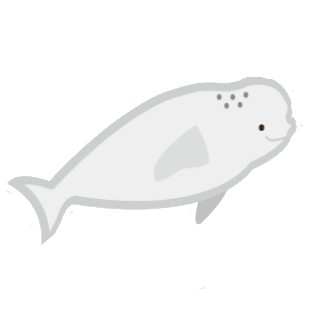

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/mamifero/m_mono.png :  mamifero[0.518257]


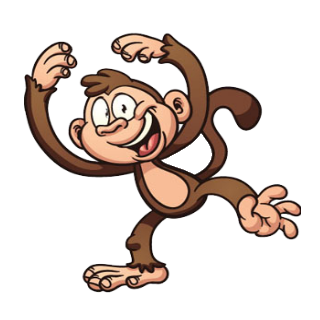

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/mamifero/m_panda.png :  mamifero[0.5562945]


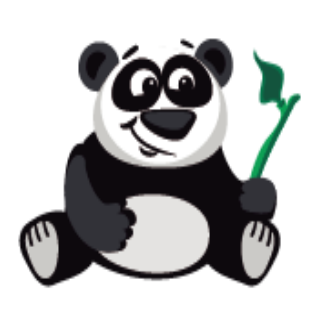


TOTAL CLASS mamifero :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  reptil


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/reptil/r_cocodrilo.png :  mamifero[0.43582532]!


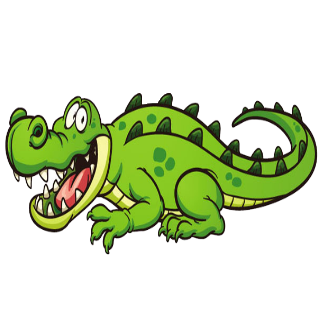

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/reptil/r_dinosaurio.png :  reptil[0.69063735]


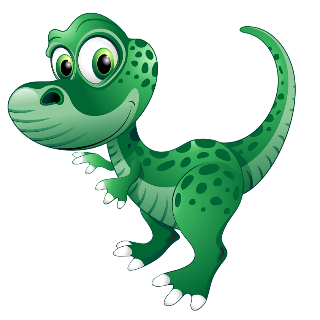

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/reptil/r_serpiente.png :  reptil[0.56845844]


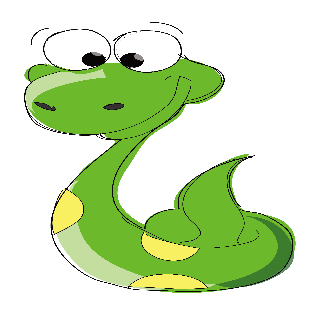


TOTAL CLASS reptil :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  insecto


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/insecto/s_abeja.png :  insecto[0.30411735]


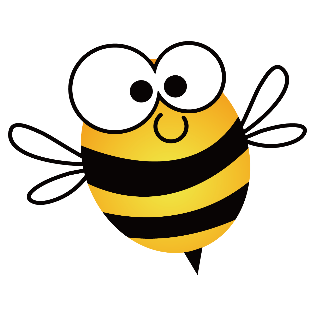

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/insecto/s_cucaracha.png :  reptil[0.2526772]!


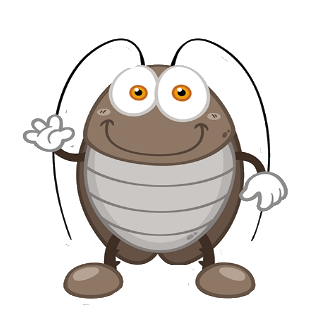

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/insecto/s_hormiga.png :  reptil[0.40771368]!


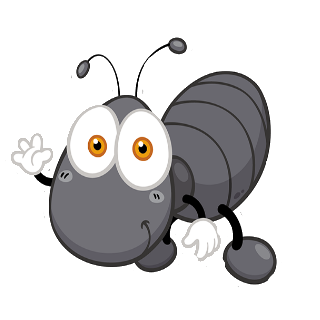


TOTAL CLASS insecto :  3 : Detectado OK  1 imágenes - Detectado con Error  2 imágenes.
con una Exactitud de 0.333333

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  ave


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/ave/a_buho.png :  mamifero[0.5187454]!


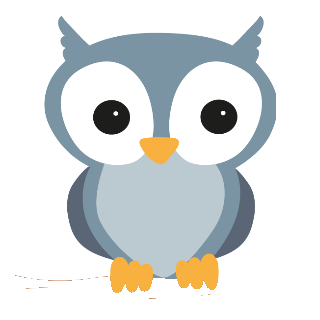

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/ave/a_pajaro.png :  pez[0.5379652]!


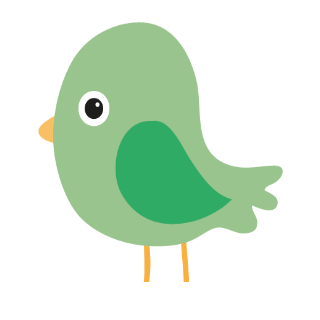

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/ave/a_tucan.png :  ave[0.43254456]


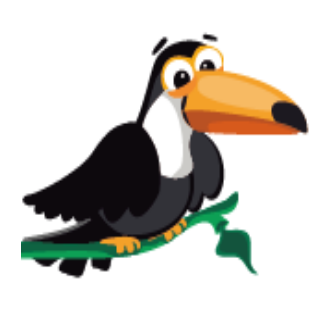


TOTAL CLASS ave :  3 : Detectado OK  1 imágenes - Detectado con Error  2 imágenes.
con una Exactitud de 0.333333

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  invertebrado


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/invertebrado/i_caracol.png :  insecto[0.27985933]!


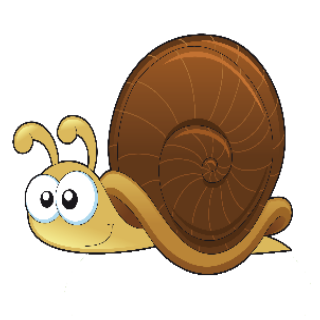

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/invertebrado/i_pulpo.png :  invertebrado[0.31446543]


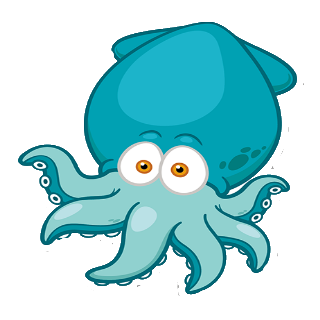

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/invertebrado/i_babosa.png :  invertebrado[0.28715888]


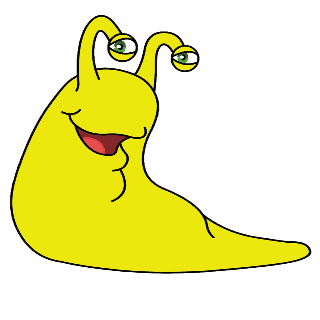


TOTAL CLASS invertebrado :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  pez


>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/pez/p_labio.png :  pez[0.5988695]


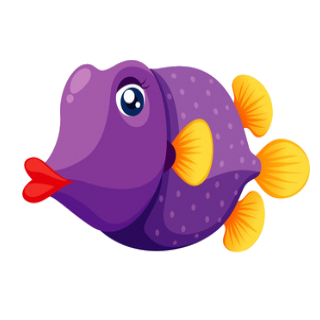

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/pez/p_atun.png :  pez[0.78711116]


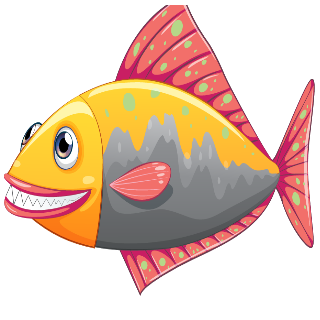

>  gdrive/My Drive/IA/demo ANIMALES/imagenes/test/pez/p_tiburon.png :  pez[0.50001085]


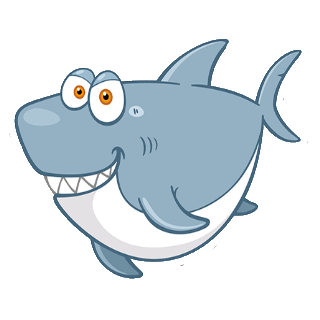


TOTAL CLASS pez :  3 : Detectado OK  3 imágenes - Detectado con Error  0 imágenes.
con una Exactitud de 1.000000

--------------------------------------------------------------------------------------------------------------- 


= TOTAL GENERAL  18 : Detectado OK  11 imágenes - Detectado con Error  7 imágenes.

= Exactitud: 0.611111

= Matriz de Confusión (real / predecido): 
                p:Ave  p:Insecto  p:Invertebrado  p:Mamifero  p:Pez  p:Reptil
r:Ave               1          0               0           1      1         0
r:Insecto           0          1               0           0      0         2
r:Invertebrado      0          1               2           0      0         0
r:Mamifero          0          0               0           2      1         0
r:Pez               0          0               0           0      3         0
r:Reptil            0          0               0           1      0         2

= Reporte de Clasificación: 
              precision    recall  f1-score 

In [7]:
# define función auxiliar para mostrar resultado de cada imágen 
def testImage(file_name, image_sample, classDesired, showPredictOK):
    result = classifier.predict(image_sample)
    
    # identifica mejor
    bestPos = np.argmax(result, axis=1)
    clasPred = str(all_classes[int(bestPos)]).lower()

    prediction = clasPred + "" + str(result[0][bestPos]) + "" 
    if clasPred == classDesired:
      res = True      
    else:
      res = False
      prediction = prediction + "!"

    # muestra resultados (solo con error)
    if ((not res) or showPredictOK):
      print("> ", file_name,": " , prediction)
      img = Image(file_name, width = "100", height = "80")
      display(img)

    return res, clasPred

# define función auxiliar para mostrar resultado de cada directorio
def testAllClass(classDesired):
  cantOK = 0
  cantNOK = 0
  predict_path =  imagPath + '/' + str(classDesired)
  print("\n")
  y_classReal = []
  y_classRes = []
  for file in os.listdir(predict_path):
      if not file.startswith('.'):
          file = predict_path + "/" + file

          image_sample = image.load_img(file, target_size = IMAGE_SHAPE)
          image_sample = image.img_to_array(image_sample)/255
          image_sample = np.expand_dims(image_sample, axis = 0)
          
          result, clRes = testImage(file, image_sample, classDesired, True)
          if (result):
            cantOK = cantOK + 1
          else:
            cantNOK = cantNOK + 1

          y_classReal.append(classDesired)
          y_classRes.append(clRes)

  print("\nTOTAL CLASS", classDesired,": ", cantOK+cantNOK, ": Detectado OK ", cantOK, "imágenes - Detectado con Error ", cantNOK, "imágenes.")  
  print('con una Exactitud de %f' % accuracy_score(y_classReal, y_classRes))

  return cantOK, cantNOK, y_classReal, y_classRes

# procesa las imágenes de la carpeta <Test>
y_tests = []
y_preds = []
okGral = 0 
NokGral = 0
all_dirs = os.listdir(imagPath)
for each_dir in all_dirs:
  if os.path.isdir(  imagPath + '/' + each_dir):
    print("\n--- Procesando ", each_dir)
    ok, nok, tests, preds = testAllClass(each_dir.lower())
    print("\n--------------------------------------------------------------------------------------------------------------- ")  
    okGral = ok + okGral 
    NokGral = nok + NokGral
    y_tests.extend(tests)
    y_preds.extend(preds)

print("\n===========================================================================================================================")
print("\n= TOTAL GENERAL ", okGral+NokGral, ": Detectado OK ", okGral, "imágenes - Detectado con Error ", NokGral, "imágenes.")

print('\n= Exactitud: %f' % accuracy_score(y_tests, y_preds))
  
print("\n= Matriz de Confusión (real / predecido): ")
cm = confusion_matrix(y_tests, y_preds, labels=[s.lower() for s in all_classes])
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in all_classes], 
    columns=['p:{:}'.format(x) for x in all_classes]
  )
print(cmtx)

print("\n= Reporte de Clasificación: ")
print(classification_report(y_tests, y_preds))

print("\n===========================================================================================================================")
